In [71]:
import requests
from dotenv import load_dotenv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

load_dotenv()
api_key = os.getenv("ALPHA_API_KEY")
symbol = "AAPL"

#print(api_key)

url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&outputsize=full&apikey=demo={api_key}"
data = requests.get(url).json()



In [72]:
test1 = pd.DataFrame(data["Time Series (Daily)"]).transpose()
test1.head()


,1. open,2. high,3. low,4. close,5. volume
2021-10-29,147.2150,149.9400,146.4128,149.8000,124953168
2021-10-28,149.8200,153.1650,149.7200,152.5700,100077888
2021-10-27,149.3600,149.7300,148.4900,148.8500,56094929
2021-10-26,149.3300,150.8400,149.0101,149.3200,60893395
2021-10-25,148.6800,149.3700,147.6211,148.6400,50720556


In [59]:
test1.index

DatetimeIndex(['2021-10-29', '2021-10-28', '2021-10-27', '2021-10-26',
               '2021-10-25', '2021-10-22', '2021-10-21', '2021-10-20',
               '2021-10-19', '2021-10-18'],
              dtype='datetime64[ns]', freq=None)

In [62]:
import plotly_express as px
fig1 = px.line(test2, y= "3. low", title= "Closing value", log_y=True)
fig1.add_scatter(y=test2["2. high"], test2.loc["2021"])
fig1.show()

SyntaxError: positional argument follows keyword argument (Temp/ipykernel_30748/3179986322.py, line 3)

In [96]:
import time
symbols = ["AAPL", "TSLA", "NVDA", "IBM"]
stock_list = []

#print(api_key)
for symbol in symbols:

    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&outputsize=full&apikey=demo={api_key}"
    data = requests.get(url).json()
    df =pd.DataFrame(data["Time Series (Daily)"]).transpose()
    df = df["4. close"].rename(symbol).astype(float)
    stock_list.append(df)
    time.sleep(12)

print(stock_list)

[2021-10-29    149.80
2021-10-28    152.57
2021-10-27    148.85
2021-10-26    149.32
2021-10-25    148.64
               ...  
1999-11-05     88.31
1999-11-04     83.62
1999-11-03     81.50
1999-11-02     80.25
1999-11-01     77.62
Name: AAPL, Length: 5536, dtype: float64, 2021-10-29    1114.00
2021-10-28    1077.04
2021-10-27    1037.86
2021-10-26    1018.43
2021-10-25    1024.86
               ...   
2010-07-06      16.11
2010-07-02      19.20
2010-07-01      21.96
2010-06-30      23.83
2010-06-29      23.89
Name: TSLA, Length: 2856, dtype: float64, 2021-10-29    255.67
2021-10-28    249.41
2021-10-27    244.51
2021-10-26    247.17
2021-10-25    231.66
               ...  
1999-11-05     28.25
1999-11-04     29.19
1999-11-03     27.44
1999-11-02     25.00
1999-11-01     23.50
Name: NVDA, Length: 5536, dtype: float64, 2021-10-29    125.10
2021-10-28    125.84
2021-10-27    125.17
2021-10-26    127.13
2021-10-25    127.64
               ...  
1999-11-05     90.25
1999-11-04     91.56
1

In [97]:
stocks = pd.concat(stock_list, axis = 1)
stocks.to_csv("stocks.csv")


In [98]:
stocks = pd.read_csv("stocks.csv", index_col = 0, parse_dates = True)
stocks.head()

,AAPL,TSLA,NVDA,IBM
2021-10-29,149.80,1114.00,255.67,125.10
2021-10-28,152.57,1077.04,249.41,125.84
2021-10-27,148.85,1037.86,244.51,125.17
2021-10-26,149.32,1018.43,247.17,127.13
2021-10-25,148.64,1024.86,231.66,127.64


In [99]:
stocks.loc["2020"]

,AAPL,TSLA,NVDA,IBM
2020-12-31,132.69,705.67,522.20,125.88
2020-12-30,133.72,694.78,525.83,124.34
2020-12-29,134.87,665.99,517.73,123.80
2020-12-28,136.69,663.69,516.00,124.82
2020-12-24,131.97,661.77,519.75,124.69
...,...,...,...,...
2020-01-08,303.19,492.14,240.38,135.31
2020-01-07,298.39,469.06,239.93,134.19
2020-01-06,299.80,451.54,237.06,134.10
2020-01-03,297.43,443.01,236.07,134.34


In [100]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5536 entries, 2021-10-29 to 1999-11-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    5536 non-null   float64
 1   TSLA    2856 non-null   float64
 2   NVDA    5536 non-null   float64
 3   IBM     5536 non-null   float64
dtypes: float64(4)
memory usage: 216.2 KB


(2, 2)
(4,)


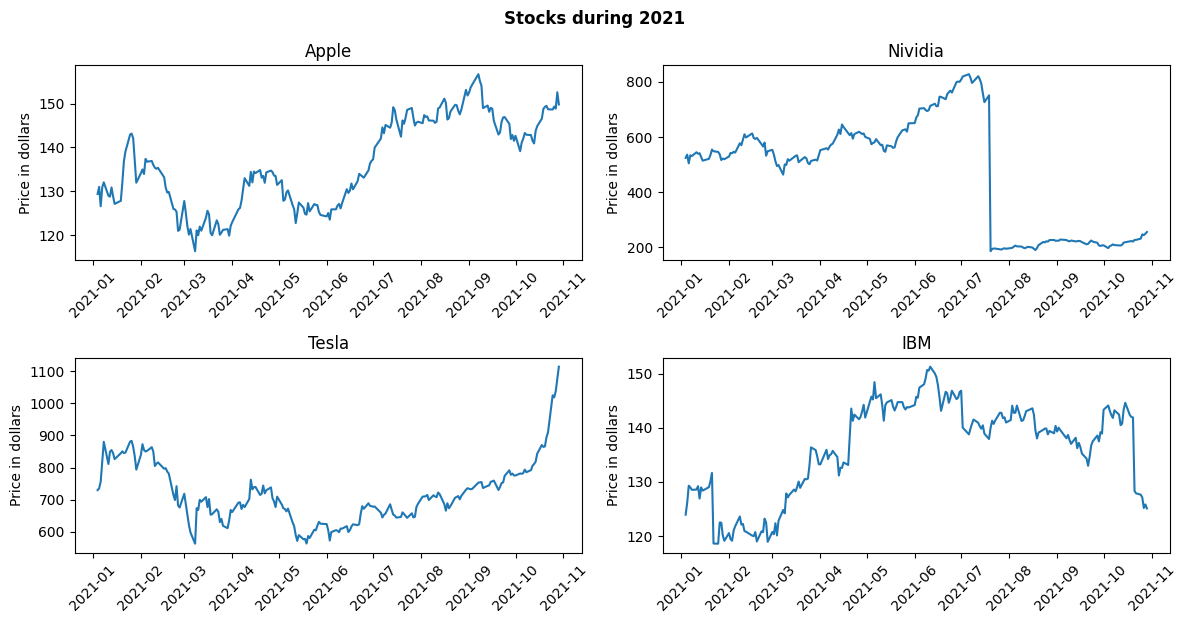

In [115]:
fig, axes = plt.subplots(2,2, dpi=100, figsize = (12,6))
print(axes.shape)
print(axes.flatten().shape)
stock_2021 = stocks.loc["2021"]

stock_names = dict(AAPL = "Apple", NVDA = "Nividia", TSLA = "Tesla", IBM= "IBM")
for ax, symbol in zip(axes.flatten(), stock_names):
    #print(symbol)
    sns.lineplot(data=stock_2021, x = stock_2021.index, y = symbol, ax = ax)
    ax.tick_params(axis="x", rotation =45)
    ax.set(title =f"{stock_names[symbol]}", ylabel = "Price in dollars" )

fig.tight_layout()
fig.suptitle("Stocks during 2021", y =1.03, fontweight = "bold")
plt.savefig("stocks2021.png")